In [2]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order
from TDD.TDD_Q import cir_2_tn,add_trace_line,add_inputs,add_outputs
#get_real_qubit_num
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit.circuit.library import IQP
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator

1. Input and output functionality does not currently allow for a non computational state basis input.

2. Provided with effiecent query for the amplitude of a a specific state, as well as smapling. Does not seem effeicent to get the whole statevector.

In [3]:
input_s=[]
output_s=[]
input_s=[0]  #input of zero state yeilds zero state again
#input_s=np.array(1/np.sqrt(2),1/np.sqrt(2)) # input of length 2 corresponding to hilbert space does not work
#output_s=[0]*n
# output_s=[random.randint(0,1) for k in range(n)]

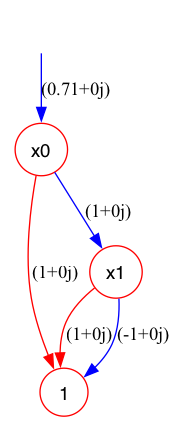

In [4]:
Ini_TDD(['x0','y0','x1','y1'])
U=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
id1=np.array([[1,0],[0,1]])
var=[Index('x0'),Index('y0')]
var2=[Index('y0'),Index('x1')]
ts1=Tensor(U,var)
ts2=Tensor(id1,var2)
tn=TensorNetwork([ts1,ts2])
tn.cont().show()

we can also get the matrix of any given TDD with .to_array()

In [5]:
input_s=[0] 
add_inputs(tn,input_s,1)
#add_outputs(tn,output_s,1)

tn.cont().get_statevector(1)

array([0.70710678+0.j, 0.70710678+0.j])

This is further demonstrated by the QFT, ran below with 13 qubits. Not only is qiskit faster, but the TDD also gives a wildly wrong output. As above the probability of going from |0> to |0> is all that is shown,completely missing the superposition that the circuit actually produces!

In [4]:
path='Benchmarks/'
file_name="QFT_20.qasm"
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs=cir_2_tn(cir)
n=cir.num_qubits
input_s=[]
output_s=[]
input_s=[0]*n
#input_s=[random.randint(0,1) for k in range(n)]
#output_s=[0]*n
# output_s=[random.randint(0,1) for k in range(n)]
if input_s:
    add_inputs(tn,input_s,n)
if output_s:
    add_outputs(tn,output_s,n)
Ini_TDD(index_order=all_indexs)
t_start=time.time()
tdd=tn.cont(optimizer='tree_decomposition')
print("time: ",time.time()-t_start)
print("an amp: ",tdd.get_amplitude([1,0,0,1,1]))
print("The statevector: ", tdd.get_statevector(n))
#tdd.sampling(100)

what no way
time:  3.4144270420074463
an amp:  (0.0009765624999999985+0j)
The statevector:  [0.00097656+0.j 0.00097656+0.j 0.00097656+0.j ... 0.00097656+0.j
 0.00097656+0.j 0.00097656+0.j]


In [7]:
import itertools
import numpy

which = list(itertools.product(*[(0, 1)] * n))
print(list(which[0]).pop())

0


In [5]:
backend = AerSimulator(method='statevector')
cir20=QuantumCircuit.from_qasm_file(path+file_name)
cir20.save_statevector()
qc=transpile(cir20,backend=backend)
job=backend.run(qc)
result=job.result()
cir20.num_qubits
print(result.get_statevector())

Statevector([0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, ...,
             0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [13]:
def generate_interaction_matrix(size):
    # Generate a random symmetric matrix
    interaction_matrix = np.random.rand(size, size)
    interaction_matrix = (interaction_matrix + interaction_matrix.T) / 2  # Ensure symmetry

    # Set diagonal elements to 0 (no self-interaction)
    np.fill_diagonal(interaction_matrix, 0)

    return interaction_matrix

# Example usage:
n = 22  # Change this to desired size
interactions= generate_interaction_matrix(n)
cir3=IQP(interactions)

In [9]:
tn,all_indexs=cir_2_tn(cir3)
n=cir3.num_qubits
print(n)
output_s=[]
input_s=[0]*n
#input_s=[random.randint(0,1) for k in range(n)]
#output_s=[0]*n
# output_s=[random.randint(0,1) for k in range(n)]
if input_s:
    add_inputs(tn,input_s,n)
if output_s:
    add_outputs(tn,output_s,n)
t_start=time.time()
tdd=tn.cont(optimizer='tree_decomposition')
print("time: ",time.time()-t_start)
print("an amp: ",tdd.get_amplitude([0,0]))
print("The statevector: ", tdd.get_statevector(n))

what no way
5
time:  0.3028388023376465
an amp:  (-0.11359564329411541+0.3607604715845404j)
The statevector:  [ 1.87836202e-01+0.26436718j  2.28372839e-01+0.06520312j
  1.71290398e-01+0.04675129j  5.81261695e-02-0.04478722j
  2.11309484e-01+0.05680538j  6.25355839e-02-0.04803623j
  1.01706513e-03-0.05120238j  2.05290342e-02-0.12781694j
  1.24649055e-01+0.0382825j  -3.06566291e-04-0.06222669j
  1.81890232e-02-0.09047318j  1.97108091e-02+0.02609341j
  2.83103420e-02-0.05631252j  8.61203576e-03-0.02953414j
  3.67367189e-02+0.04005429j -1.76918193e-01-0.02716787j
  2.47393122e-01+0.08391007j  1.53370116e-01-0.1058758j
 -3.84494849e-04-0.07332153j -6.47000293e-02-0.14138767j
  1.58298599e-01-0.08949662j -2.63973564e-01-0.1419768j
 -5.74248807e-02-0.0538963j  -1.13595643e-01+0.36076047j
  3.65235492e-02-0.06506069j -6.01824156e-02-0.03315023j
 -2.81899818e-03+0.04339949j -1.17068778e-01+0.04827597j
 -2.13108189e-02-0.11950527j -1.01437563e-01+0.24260674j
 -1.39614366e-01+0.0256983j   3.46926

In [14]:
cir3.save_statevector()
qc3=transpile(cir3,backend=backend)
job3=backend.run(qc3)
result3=job3.result()
cir3.num_qubits
print(result3.get_statevector())

Statevector([-0.07565564-0.0418763j , -0.01644166-0.01285607j,
             -0.02096351-0.00387019j, ...,  0.00752401-0.0059226j ,
              0.00262937-0.0063681j , -0.01481936+0.03783714j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))
